<a href="https://colab.research.google.com/github/rich7420/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Normalize pixel values to range [0, 1]
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=64)

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

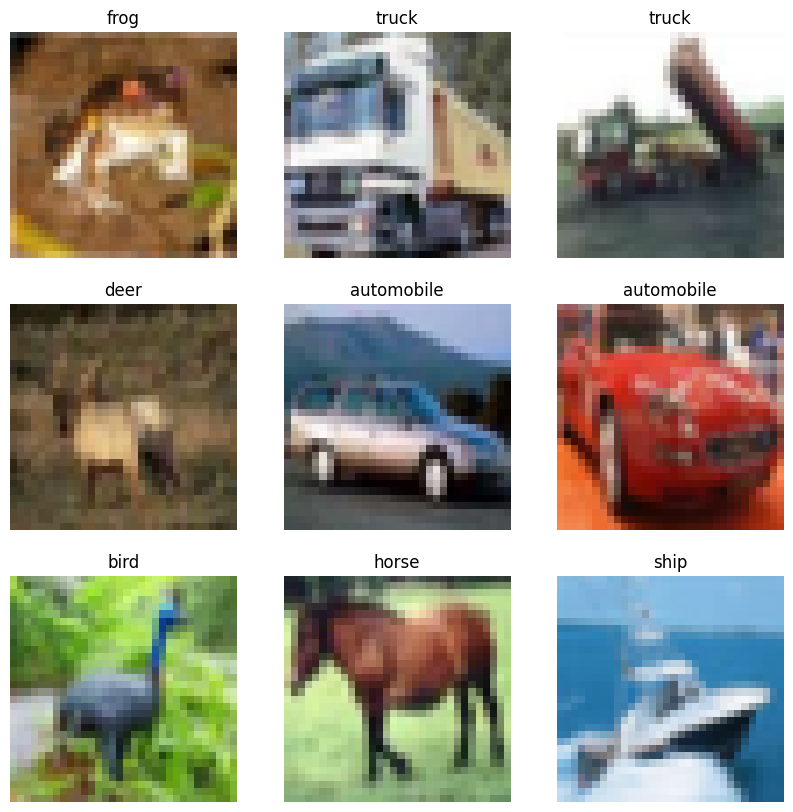

In [13]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [14]:
from tensorflow.keras import regularizers
model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    # Conv Layer 2
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Conv Layer 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Conv Layer 4
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    # Dense Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153,514 (4.40 MB)

 Trainable params: 1,153,002 (4.40 MB)

 Non-trainable params: 512 (2.00 KB)

In [15]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Step 6: Train the Model
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=32,
    callbacks=[early_stop]
)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.3028 - loss: 2.0855 - val_accuracy: 0.4625 - val_loss: 1.6076
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4783 - loss: 1.5087 - val_accuracy: 0.5619 - val_loss: 1.3779
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.5598 - loss: 1.3062 - val_accuracy: 0.5759 - val_loss: 1.3209
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6047 - loss: 1.1834 - val_accuracy: 0.6598 - val_loss: 1.0766
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6382 - loss: 1.1010 - val_accuracy: 0.6421 - val_loss: 1.1065
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6589 - loss: 1.0477 - val_accuracy: 0.6856 - val_loss: 0.9742
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6693 - loss: 1.0305 - val_accuracy: 0.6815 - val_loss: 1.0445
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.6863 - loss: 0

In [17]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


157/157 - 1s - 5ms/step - accuracy: 0.8219 - loss: 0.6292

Test accuracy: 0.8219


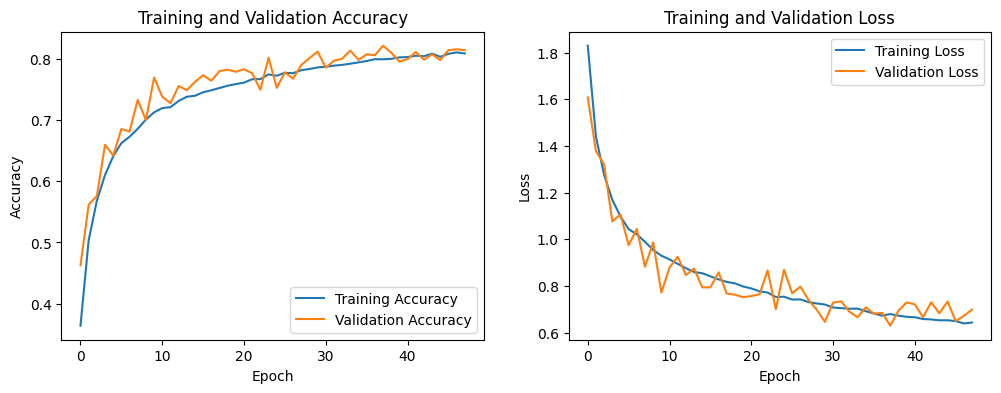

In [18]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Step 9: Make Predictions (with correct preprocessing)
sample_images, sample_labels = next(test_generator)  # 從 test_generator 拿一 batch
sample_images = sample_images[:5]
sample_labels = sample_labels[:5]

predictions = model.predict(sample_images)
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[sample_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Image 1: Predicted: deer, True: bird
Image 2: Predicted: ship, True: ship
Image 3: Predicted: bird, True: bird
Image 4: Predicted: deer, True: deer
Image 5: Predicted: truck, True: truck


In [20]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8219
Test Loss: 0.6292
Final Training Accuracy: 0.8093
Final Validation Accuracy: 0.8147
Final Training Loss: 0.6430
Final Validation Loss: 0.6984
Training Epochs: 48
Model Parameters: 1153514


# Task 5: Report
## 實驗結果:
Model Performance Summary:
Test Accuracy: 0.8306
Test Loss: 0.6215
Final Training Accuracy: 0.8087
Final Validation Accuracy: 0.8137
Final Training Loss: 0.6535
Final Validation Loss: 0.6546
Training Epochs: 47
Model Parameters: 1153514
## 說明
此資料集為cifar10資料集，總共50000筆資料，大小為32*32，顏色為3(rgb)
一開始利用ImageDataGenerator作為資料集擴增的手段，利用
'''          
rotation_range=15   隨機旋轉 ±15 度     
width_shift_range=0.1    水平方向隨機移動最多 ±10% 的寬度
height_shift_range=0.1   垂直方向隨機移動最多 ±10% 的高度
horizontal_flip=True     鏡像
'''
提升泛化能力，解決overfitting

網路層設計:
參考文獻網路層設計，利用一層轉置層加正規化(batchnorm)，重複兩次再加一次maxpooling的設計(vgg)，加深網路層數(總六層)
激發函數選擇relu避免overfitting，filter size 都設置為(3,3)
再經過flatten+full connect network，作為cnn完成分類任務
```
#Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
#Conv Layer 2
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
#Conv Layer 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

#Conv Layer 4
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

#Dense Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    # Output Layer
    layers.Dense(10, activation='softmax')
```
本來以regulization作為提升泛化能力避免overfitting的手段，但結果不如預期，且不如使用batchnorm的結果
接下來使用early stop作為避免overfitting的手段，使停在最好的參數
```
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
```
利用觀察val_accuracy，如在10epoch內沒有提升，則停下訓練，並回到最佳參數的位置

參數設定:
```
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[early_stop]
)
```
使用資料擴增後的資料訓練，並設定訓練100圈，並且停在最佳參數避免overfitting
